In [1]:
import pandas as pd 
from haversine import haversine,Unit
from p_tqdm import p_map
import numpy as np


In [2]:
cdata = pd.read_csv('oa21-data-v2.csv')

In [3]:
coords = cdata[['lat','lng']].values

def get_dist(item):
    def fn(x):
        return haversine(x,item,unit=Unit.METERS)
        
    dist = np.min(abs(coords-item),axis = 1)

    keep = [val for (_, val) in sorted(zip(dist,coords), key=lambda x: x[0])][:10]

    distance = list(map(fn,keep))
    distance.sort()

    # print(keep,'---',item)
    return distance[1]


# get_dist(coords[10000])


In [8]:

coords[0]



array([51.52025, -0.09493])

In [4]:
dist = p_map(get_dist,coords)






100%|██████████| 188880/188880 [1:44:26<00:00, 30.14it/s]   


In [5]:
cdata['dist'] = dist
cdata.to_csv('distances.csv')

In [6]:
cdata.sort_values('dist')

,oa21cd,lsoa21cd,msoa21cd,lng,lat,population,dist
175566,E00187556,E01033400,E02006904,-1.14165,52.94549,110,2.596443
175556,E00187546,E01033400,E02006904,-1.14167,52.94551,297,2.596443
177125,E00189115,E01032976,E02007072,-0.95658,52.24134,146,4.447803
176992,E00188982,E01032976,E02007072,-0.95658,52.24138,143,4.447803
172439,E00184428,E01002160,E02000453,-0.34274,51.58048,134,5.323638
...,...,...,...,...,...,...,...
82618,E00087433,E01033239,E02003592,-1.51651,50.67481,271,302507.327733
131922,E00139266,E01027369,E02005705,-1.95463,55.31414,237,306721.621278
132034,E00139385,E01027388,E02005706,-1.99423,55.75342,344,311268.388131
131963,E00139308,E01027375,E02005708,-1.95666,55.51463,130,317359.654636


<AxesSubplot:ylabel='Frequency'>

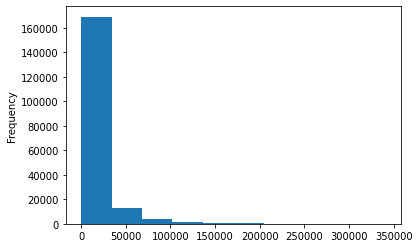

In [24]:
cdata.sort_values('dist')['dist'].plot(kind='hist')

In [25]:
# lat 

test = [51,0]
print('---- LAT ----')
for i in  range(1,7):
    compare = test.copy()
    delta = eval('1e-'+str(i))

    compare[1] -= delta
    d = haversine(test,compare,unit=Unit.METERS)
    print(delta,d,'metres')


print('---- LNG ----')
for i in  range(1,7):
    compare = test.copy()
    delta = eval('1e-'+str(i))

    compare[0] += delta
    d = haversine(test,compare,unit=Unit.METERS)
    print(delta,d,'metres')

'centre point',test



---- LAT ----
0.1 6997.732601117092 metres
0.01 699.7733132174285 metres
0.001 69.97733137484857 metres
0.0001 6.997733137537963 metres
1e-05 0.6997733137538494 metres
1e-06 0.06997733137538499 metres
---- LNG ----
0.1 11119.508023353306 metres
0.01 1111.9508023352598 metres
0.001 111.19508023324306 metres
0.0001 11.119508023465771 metres
1e-05 1.1119508024880418 metres
1e-06 0.11119507996587456 metres


('centre point', [51, 0])

In [19]:
cdata.describe()


,lng,lat,population,dist
count,188880.000000,188880.000000,188880.000000,188880.000000
mean,-1.326959,52.352274,315.531200,12654.445990
std,1.304386,1.130842,94.890311,24129.125840
min,-6.352830,49.913340,98.000000,2.596443
25%,-2.208755,51.476610,263.000000,929.687963
50%,-1.355760,52.110880,306.000000,3368.378963
75%,-0.225565,53.366135,355.000000,12889.667053
max,1.755900,55.786280,4501.000000,340949.690904


In [56]:

def shrink(x):

    '''---- LAT ----
    0.1 6997.732601117092 metres
    0.01 699.7733132174285 metres
    0.001 69.97733137484857 metres
    0.0001 6.997733137537963 metres
    1e-05 0.6997733137538494 metres
    1e-06 0.06997733137538499 metres
    ---- LNG ----
    0.1 11119.508023353306 metres
    0.01 1111.9508023352598 metres
    0.001 111.19508023324306 metres
    0.0001 11.119508023465771 metres
    1e-05 1.1119508024880418 metres
    1e-06 0.11119507996587456 metres
    ('centre point', [51, 0])'''

    x=x[1]
    dist = x.dist

    if dist < 50:
        decimal = 5
    elif dist < 100: 
        decimal = 4
    elif dist < 1000:
        decimal = 3
    elif dist < 2000:
        decimal = 2
    else: decimal=1


    x['lat'] = str(round(float(x['lat']),decimal))
    x['lng'] = str(round(float(x['lng']),decimal))

    return x.values





    
    

In [58]:
df = pd.DataFrame(map(shrink,cdata.iterrows()))



In [65]:
df.columns = cdata.columns
df = df.drop('dist',axis=1)

In [67]:
df.to_csv('oa21-data-v3.csv',index=False)

In [73]:
new = len(open('oa21-data-v3.csv').read())
old = len(open('oa21-data-v2.csv').read())
diff = old-new



new, old, diff




19740928 bits


(8519275, 9753083, 1233808)

Populating the interactive namespace from numpy and matplotlib


<AxesSubplot:xlabel='lng', ylabel='lat'>

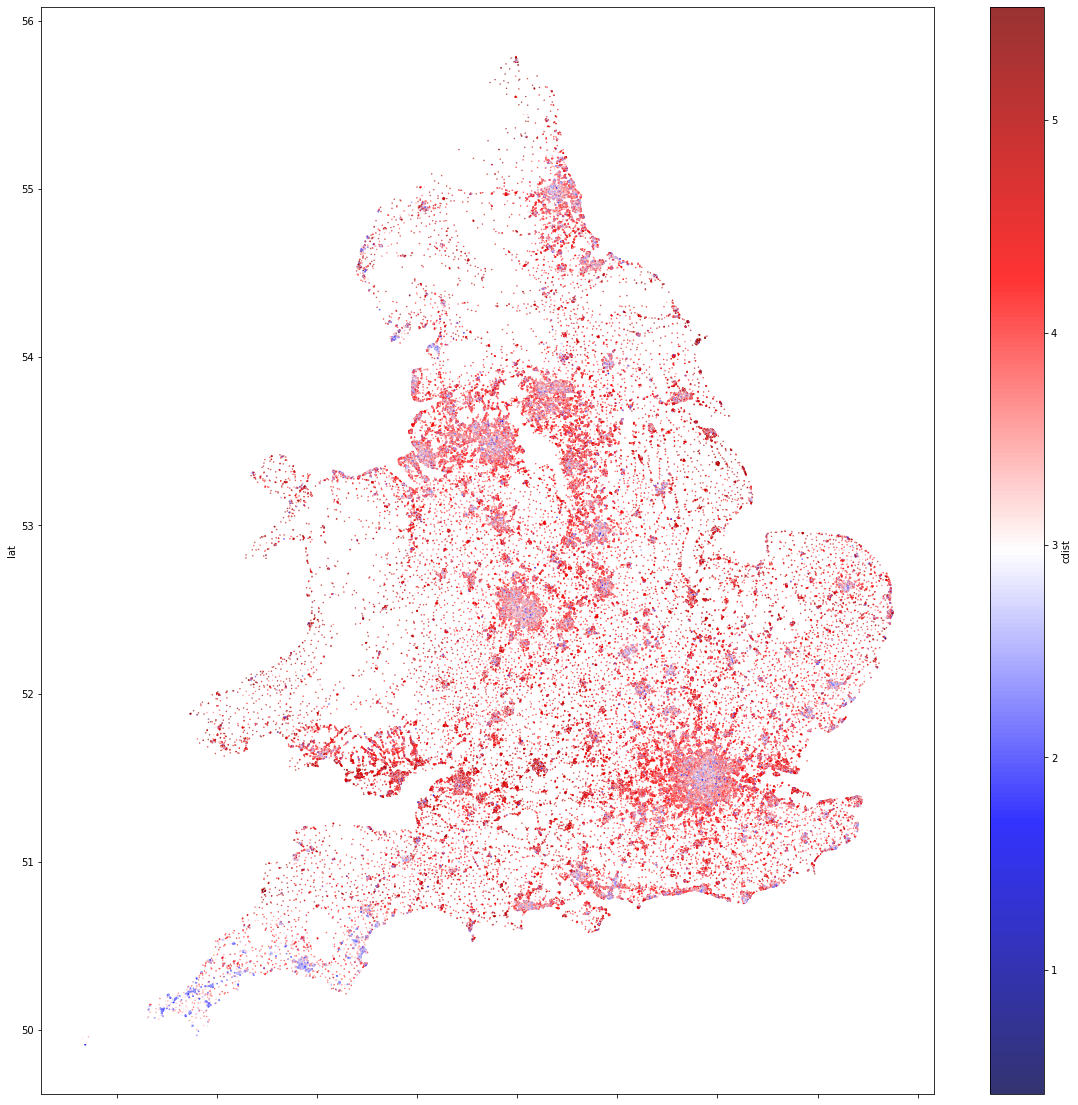

In [93]:
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 20)
cdata['cdist'] = np.log10(cdata.dist)
cdata.plot(kind='scatter', y='lat', x = 'lng', c='cdist', colormap='seismic',s=.2,alpha=.8)

In [108]:
mdist = np.log10(cdata.dist)
mdist -= mdist.min()
mdist /= mdist.max()

mdist = round(0.2+ 4*(1-mdist)).astype(np.int8)
df.r = mdist
df.to_csv('oa21-data-v4.csv',index=False)



mdist

0         2
1         2
2         2
3         2
4         2
         ..
188875    1
188876    3
188877    1
188878    2
188879    2
Name: dist, Length: 188880, dtype: int8